<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Train-Neural-Network-on-the-MNIST-dataset" data-toc-modified-id="Train-Neural-Network-on-the-MNIST-dataset-1">Train Neural Network on the MNIST dataset</a></span></li><li><span><a href="#Define-architecture" data-toc-modified-id="Define-architecture-2">Define architecture</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-3">Prepare data</a></span></li><li><span><a href="#Define-a-multilayer-perceptron-(MLP)--" data-toc-modified-id="Define-a-multilayer-perceptron-(MLP)---4">Define a multilayer perceptron (MLP)  </a></span></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-5">Train model</a></span></li><li><span><a href="#Evaluate-model-on-test-data" data-toc-modified-id="Evaluate-model-on-test-data-6">Evaluate model on test data</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-7">Check for understanding</a></span></li></ul></div>

Train Neural Network on the MNIST dataset
-----

<center><img src="images/mnistExamples.png" width="75%"/></center>

[Based on this code](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py)

<br>
<details><summary>
What are the high-level steps to build an Image Classification System?
</summary>
1. Get labeled data <br>
2. Define an architecture <br>
3. Train <br>
4. Test <br>
</details>

----
Define architecture
-----

<center><img src="images/mnist_arch.png" width="75%"/></center>

----
Prepare data
----

In [3]:
reset -fs

In [4]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist

In [5]:
# We are using TensorFlow in beta

# There is a odd logging error we should ignore
# https://github.com/tensorflow/tensorflow/issues/8340#issuecomment-332212742

import logging
logging.getLogger('tensorflow').disabled = True

<center><img src="images/ml_workflow.png" width="45%"/></center>

In [6]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(f'Number of train examples: {x_train.shape[0]:,}')
print(f'Number of test examples:  {x_test.shape[0]:,}')

Number of train examples: 60,000
Number of test examples:  10,000


In [8]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

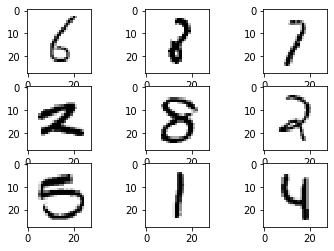

In [9]:
# Visually inspect a random selection of images
for i in range(9):
    pyplot.subplot(331 + i) # 331  is a hack for [row, col, index]
    pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='gray_r')

In [10]:
# Convert image matrix into vector to feed into first layer 

image_size = 784 # 28 x 28  

x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

# All transformation to train data have to be applied to test data
x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

In [11]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

RTFM - https://keras.io/getting-started/sequential-model-guide/

Define a multilayer perceptron (MLP)  
-----

In [13]:
# Define model
model = Sequential()

In [14]:
# Define first hidden layer
layer_input = Dense(units=512, 
                    activation='sigmoid', 
                    input_shape=(image_size,))
model.add(layer_input)

In [15]:
# Define another hidden layer
layer_input = Dense(units=512, 
                    activation='sigmoid')
model.add(layer_input)

In [16]:
# Define output layers
layer_output = Dense(units=num_classes,
                     activation='softmax')

model.add(layer_output)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.optimizers import SGD

In [19]:
model.compile(loss='categorical_crossentropy', # How do we penalize errors? Increases as the predicted probability diverges from the actual label.
              optimizer=SGD(), # Stochastic Gradient Descent - More on optimitization day
              metrics=['accuracy']) # Number correct / total

__Learn more about Cross Entropy__

- [Brief intro to common loss functions](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
- [A Friendly Introduction to Cross-Entropy Loss](https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/)

----
Train model
-----

In [20]:
# Batch size is the number of data examples before a backprop pass
batch_size = 128 

<br>
<details><summary>
Why do we pick 128?
</summary>
It is a power of 32 which optimizes data loading for common computer architectures.
</details>

In [21]:
# Epochs is the number of passes over complete dataset
epochs = 1 # Try 1 to make sure model works (aka, the linear algebra is correct)
# epochs = 10 # Then scale up to small value to make sure model is learning at least a little during each epoch
# epochs = 50 # Then do full run which make take hours, days, or even weeks!

In [22]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2668 - accuracy: 0.1982
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 2.1781 - accuracy: 0.4295
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 2.0626 - accuracy: 0.5558
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 1.8924 - accuracy: 0.6217
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.6614 - accuracy: 0.6682
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 1.4093 - accuracy: 0.7075
Epoch 7/10
34432/60000 [================>.............] - ETA: 3s - loss: 1.2345 - accuracy: 0.7373

_NotOkStatusException: InvalidArgumentError: Error while reading CompositeTensor._type_spec.

__Now we wait...__

<center><img src="images/waiting.jpg" width="35%"/></center>

Evaluate model on test data
-----

In [24]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=False)
print(f"Test loss:      {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

Test loss:      1.16
Test accuracy: 75.140%


<center><h2>Check for understanding</h2></center>

- How well does the model do? Better than chance? Better than humans?
- How could the model be improved?